In [303]:
# to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [305]:
df=pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [307]:
df['Dataset'].unique()

array([1, 2], dtype=int64)

In [308]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'Age':
[65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]


Unique values in 'Gender':
['Female' 'Male']


Unique values in 'Total_Bilirubin':
[ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ]


Unique values in 'Direct_Bilirubin':
[ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1. 

In [309]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Dataset'] = le.fit_transform(df['Dataset'])

df.head()

#female = 0, male = 1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [310]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [311]:
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [312]:
# plt.figure(figsize=(20,20))
# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap='Blues', annot_kws={"size": 18})

# plt.xticks(fontsize=18)  # Increase x-axis label size
# plt.yticks(fontsize=18)  # Increase y-axis label size

# plt.savefig("lab3 output/hm.png", dpi=500)
# plt.show()


In [313]:
df = df.astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    float64
 1   Gender                      583 non-null    float64
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    float64
 5   Alamine_Aminotransferase    583 non-null    float64
 6   Aspartate_Aminotransferase  583 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    float64
dtypes: float64(11)
memory usage: 50.2 KB


In [314]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0.0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0.0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0.0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...
578,60.0,1.0,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,1.0
579,40.0,1.0,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,0.0
580,52.0,1.0,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,0.0
581,31.0,1.0,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,0.0


In [315]:
X = df.drop(['Dataset'], axis=1)
y = df[['Dataset']]

In [316]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmax_scaler = MinMaxScaler(feature_range=(0, 1))


X_scaled = scaler.fit_transform(X)
X_scaled_minmax = minmax_scaler.fit_transform(X)

In [317]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [318]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [357]:
import numpy as np
from scipy.spatial import distance

np.random.seed(42)

def train_SOM(data, epochs, initial_learning_rate, input_size, num_cluster):
    weights = np.random.rand(num_cluster, input_size)
    for epoch in range(epochs):
        for input_vector in data:
            distances = np.sum((weights - input_vector) ** 2, axis=1)
            min_distance_index = np.argmin(distances)
            learning_rate = initial_learning_rate * np.exp(-epoch / epochs)
            weights[min_distance_index] = weights[min_distance_index] + learning_rate * (input_vector - weights[min_distance_index])
    return weights


weights = train_SOM(X_train_pca, epochs=100, initial_learning_rate=0.001, input_size=X_train_pca.shape[1], num_cluster=2)

Quantization Error: 1.4576587816371351
Normalized Quantization Error: 0.6029246669255894


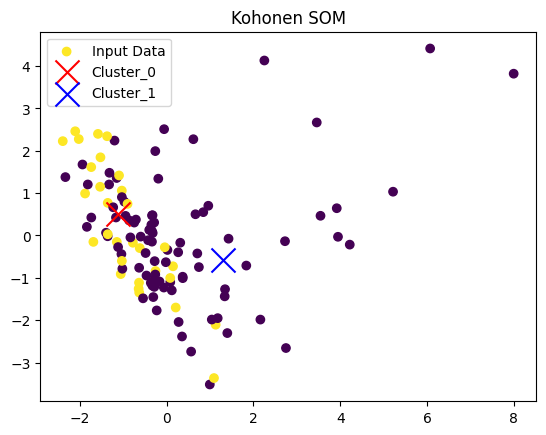

In [358]:
def calculate_error(weights, data):
    max_possible_error = np.sqrt(np.sum((np.max(weights) - np.min(weights)) ** 2))
    total_error = 0
    for input_vector in data:
        distances = np.sum((weights - input_vector) ** 2, axis=1)
        min_distance_index = np.argmin(distances)
        total_error += distance.euclidean(input_vector, weights[min_distance_index])

    normalized_error = total_error / (len(data) * max_possible_error)
    quantiza_error = total_error / len(data)

    return quantiza_error, normalized_error

def visualize_SOM(weights, data, y):
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=y, label='Input Data')

    colours = ['red', 'blue', 'green']

    for i, weight in enumerate(weights):
        plt.scatter(weight[0], weight[1], c=colours[i], marker='x', s=300, label=f'Cluster_{i}')

    plt.title('Kohonen SOM')
    plt.legend()
    # plt.savefig("./lab4_output/kohonen.png")
    plt.show()


quantiza_error, normalized_error = calculate_error(weights, X_test_pca)
print(f"Quantization Error: {quantiza_error}\nNormalized Quantization Error: {normalized_error}")

visualize_SOM(weights, X_test_pca, y_test.values)

Quantization Error: 2.2798004922469737
Normalized Quantization Error: 1.2803993508576643


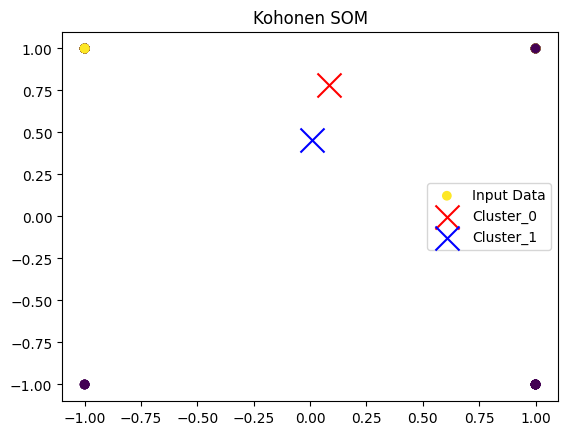

In [352]:
weights_without_pca = train_SOM(X_train, epochs=50, initial_learning_rate=0.001, input_size=X_train.shape[1], num_cluster=2)

quantiza_error, normalized_error = calculate_error(weights_without_pca, X_test)
print(f"Quantization Error: {quantiza_error}\nNormalized Quantization Error: {normalized_error}")

visualize_SOM(weights_without_pca, X_test, y_test.values)

In [321]:
from sklearn.model_selection import train_test_split

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Convert features to binary patterns (+1 or -1)
X_binary = np.where(X_scaled>= 0, 1, -1)

X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.20, random_state=42)

In [322]:
import numpy as np
import matplotlib.pyplot as plt


def hard_limiting_nonlinearity(x):
    return np.sign(x)


def hopfield_network(X_train, X_test, num_iteration = 200):
    num_nodes = X_train.shape[1]
    count=0

    # Step 1: Assign connection weights based on training patterns
    W = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                W[i, j] += np.sum(X_train[:, i] * X_train[:, j])

    print(W)

    reconstructed_patterns = []

    for mu in X_test:        # Step 2: Initialize with the test pattern

        for _ in range(num_iteration):      # Step 3: Iterate until convergence

            prev_mu = mu.copy()
            for i in range(num_nodes):
                total_input = np.dot(W[i, :], mu)
                mu[i] = hard_limiting_nonlinearity(total_input)

            # Check for convergence
            if np.array_equal(mu, prev_mu):
                count+=1
                break

        reconstructed_patterns.append(mu)

    return np.array(reconstructed_patterns), count



# Run Hopfield Network algorithm
reconstructed_pattern, count = hopfield_network(X_train, X_test)

print(count/X_test.shape[0]*100)


[[   0.   30.    8.   18.    6.  -36.  -14.  -52.  -68.  -80.]
 [  30.    0.  -92.  -74. -110. -116.  -98.  -24.  -44.    4.]
 [   8.  -92.    0.  448.  200.  266.  288.  -22.  -82.  -94.]
 [  18.  -74.  448.    0.  194.  252.  286.  -24.  -88. -104.]
 [   6. -110.  200.  194.    0.  220.  190.   -4.  -36. -108.]
 [ -36. -116.  266.  252.  220.    0.  340.   -6.   -6.  -22.]
 [ -14.  -98.  288.  286.  190.  340.    0.  -12.  -40.  -52.]
 [ -52.  -24.  -22.  -24.   -4.   -6.  -12.    0.  294.  106.]
 [ -68.  -44.  -82.  -88.  -36.   -6.  -40.  294.    0.  270.]
 [ -80.    4.  -94. -104. -108.  -22.  -52.  106.  270.    0.]]
100.0


In [323]:
import numpy as np

def evaluate_hopfield(X_test, reconstructed_patterns):
    num_test_patterns = X_test.shape[0]
    correct_recalls = 0

    for pattern_index in range(num_test_patterns):
        original_pattern = X_test[pattern_index, :]
        reconstructed_pattern = reconstructed_patterns[pattern_index, :]
        
        # Check if the reconstructed pattern matches the original input pattern
        match_percentage = np.sum(reconstructed_pattern == original_pattern) / X_test.shape[1]
        
        if match_percentage >= 1.00:
            correct_recalls += 1
        # if np.array_equal(reconstructed_pattern , original_pattern):
        #     correct_recalls += 1

    recall_accuracy = correct_recalls / num_test_patterns
    return recall_accuracy

accuracy = evaluate_hopfield(X_test, reconstructed_pattern)
print(f"Pattern Recall Accuracy: {accuracy * 100:.2f}%")


Pattern Recall Accuracy: 100.00%


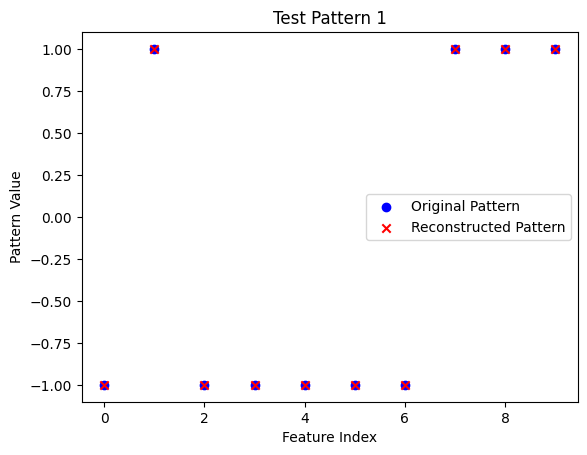

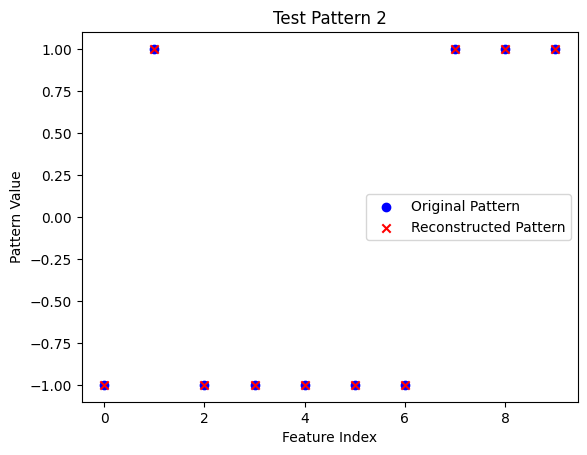

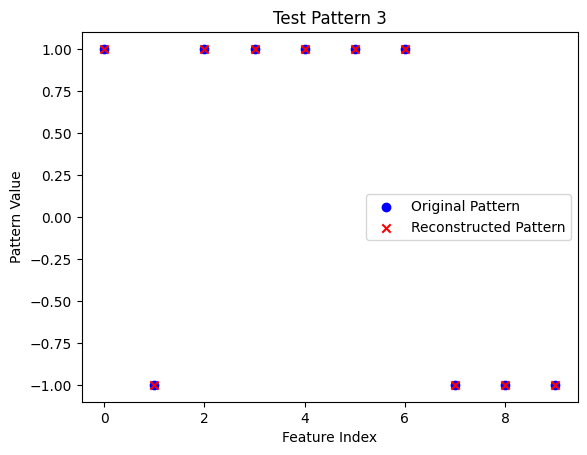

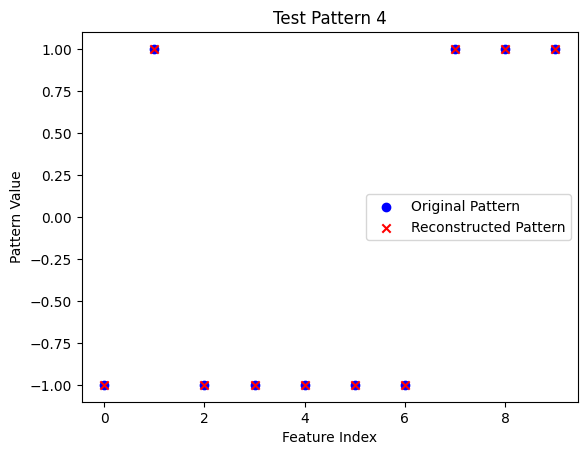

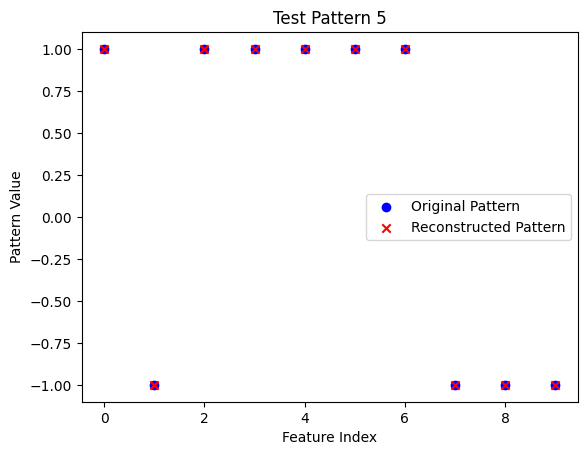

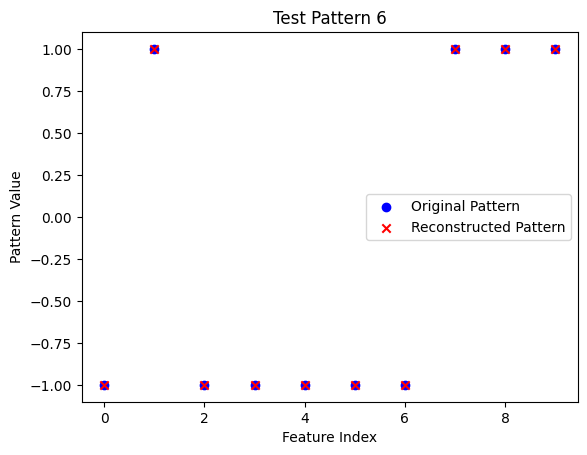

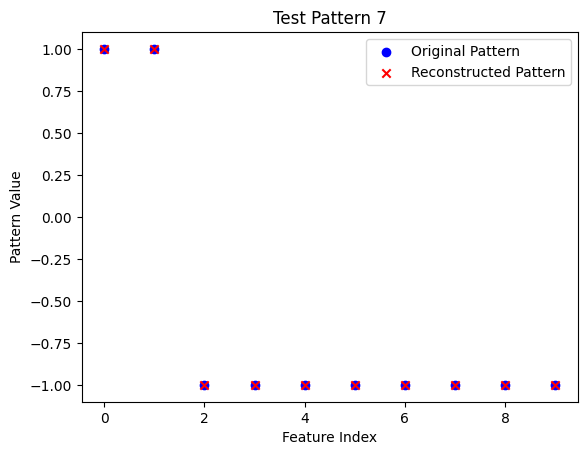

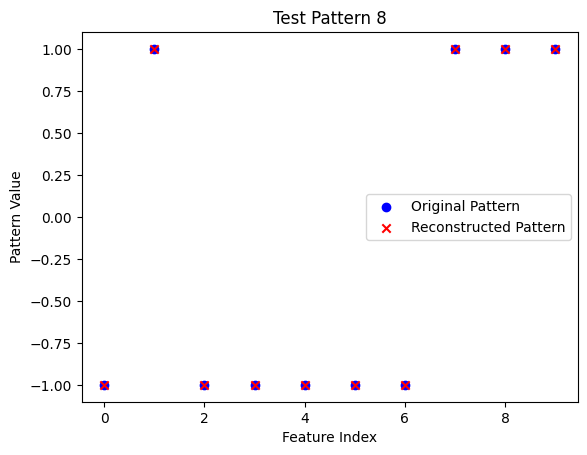

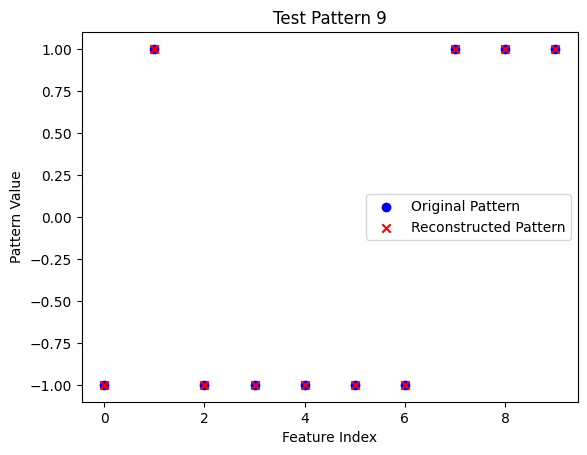

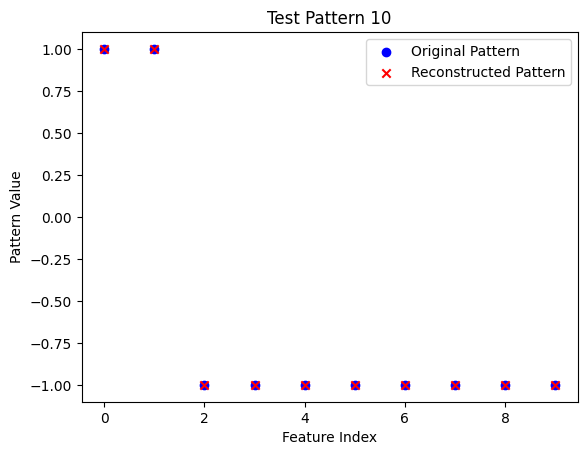

In [339]:
import matplotlib.pyplot as plt
num_features = X_test.shape[1]

# Plot original and reconstructed patterns
for pattern_index in range(10):
    plt.figure()

    # Original pattern
    plt.scatter(range(num_features), X_test[pattern_index, :], label='Original Pattern', marker='o', color='blue')

    # Reconstructed pattern
    plt.scatter(range(num_features), reconstructed_pattern[pattern_index, :], label='Reconstructed Pattern', marker='x', color='red')

    plt.title(f'Test Pattern {pattern_index + 1}')
    plt.xlabel('Feature Index')
    plt.ylabel('Pattern Value')
    plt.legend()
    plt.savefig(f"./lab4_output/test_pattern_{pattern_index}.png")
    plt.show()
